## Model

In [8]:
import pandas as pd
df = pd.read_csv("./makine_ogrenmesi/dog_reg_mod/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


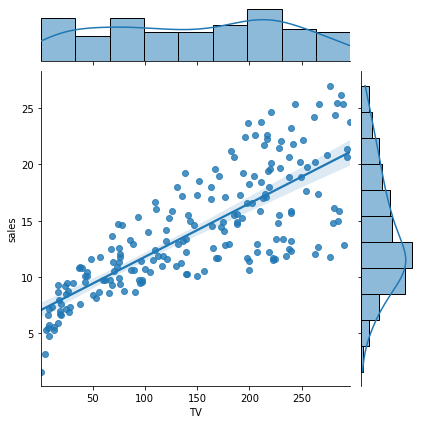

In [15]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df[["TV"]] #bağımsız değişken

In [18]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
y = df[["sales"]]

In [20]:
reg = LinearRegression() #model nesnesi oluşturmak, örnekleme işlemi

In [21]:
model = reg.fit(X, y) #fit etmek modeli kurmak anlamına gelir.

In [22]:
model

LinearRegression()

In [24]:
str(model)

'LinearRegression()'

In [32]:
dir(model) #nesnenin içerisinden alabilecek olduğumuz bazı bilgiler sunuldu.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [33]:
model.intercept_ #modelimizin sabitidir, b0'dır.

array([7.03259355])

In [34]:
model.coef_ #modelimizin b1 kat sayısı

array([[0.04753664]])

In [35]:
#rkare modelin scoreunu ifade eder.
model.score(X,y) #bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.

0.611875050850071

## Tahmin

C:\Users\Zeynep\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


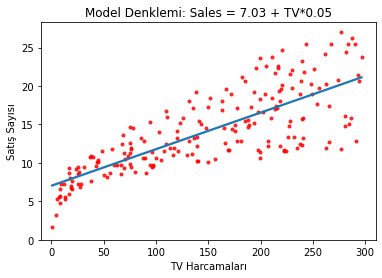

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05") #sabitimiz 7.03 kat sayısımız yaklaşık 0.05
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310) #x koordinatının sınırlarını belirledik.
plt.ylim(bottom=0);

In [42]:
7.03 + 0.05*165

15.280000000000001

In [44]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [45]:
model.predict([[165]]) #predict tahminde bulun demek

array([[14.87613922]])

In [46]:
yeni_veri = [[5], [15], [30]] #birden fazla bağımlı değişken için; 

In [47]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [51]:
y.head() #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [53]:
model.predict(X)[0:7] #satış tahminlerimizi 0'dan 7'ye kadar listeler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037]])

In [54]:
gercek_y = y[0:10]

In [57]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [60]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1) #concat birleştirme işlemidir, gerçek değerler ile tahmin edilen değerlerimizi brileştiriyoruz.

In [61]:
hatalar.columns = ["gercek_y", "tahmin_edilen_y"] #tablomuzun sütunlarını isimlendirdik.

In [62]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [96]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [65]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [66]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [67]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [69]:
import numpy as np
np.mean(hatalar["hata_kareler"]) #hata kareler ortalamamız

9.290350329638105

# Çoklu Doğrusal Regresyon

## Model

In [74]:
import pandas as pd
df = pd.read_csv("./makine_ogrenmesi/dog_reg_mod/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [78]:
X = df.drop('sales', axis = 1)
y = df[["sales"]]

In [79]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [77]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Statsmodels ile model kurmak

In [129]:
import statsmodels.api as sm

In [85]:
lm = sm.OLS(y, X) #OLS,regresyon modelini kurmak için gerekli olan fonksiyon

In [86]:
model = lm.fit() #fit model kurma işlemidir.

In [87]:
model.summary() #modelin özetlerini getir anlamı taşır.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):                   2.43e-171
Time:                        19:18:54   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## scikit learn ile model kurmak

In [89]:
lm = LinearRegression()

In [91]:
model = lm.fit(X, y)

In [92]:
model.intercept_ #sabitimiz

array([2.93888937])

In [93]:
model.coef_ #bağımsız değişkenlerimize ilişkin kat sayılarımız 

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Tahmin

In [ ]:
Sales = 2.94 + TV*0.04 + radio*0.19 - newspaper*0.001

In [97]:
2.94 + 30*0.04 + 10*0.19 - 40*0.001

5.999999999999999

In [98]:
yeni_veri = [[30],[10],[40]]

In [107]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T # T transpozunun alınması.

In [108]:
yeni_veri

,0,1,2
0,30,10,40


In [109]:
model.predict(yeni_veri)

array([[6.15562918]])

In [110]:
from sklearn.metrics import mean_squared_error

In [112]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [113]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [116]:
MSE = mean_squared_error(y, model.predict(X))  #MSE hata kat sayılar ortalaması fonksiyonu
MSE

2.784126314510936

In [117]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

## Model Tuning (Model Doğrulama)

In [118]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [119]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [120]:
#sinama seti
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

In [122]:
X_train.head() #train setinin bağımsız değişkeni

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


## k-katlı cv

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [132]:
#cross validation (CV) ile elde edilmiş MSE (çapraz doğrulama modeli)
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

3.3170289742341255

In [133]:
#cross validation (CV) ile elde edilmiş RMSE
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.8212712522395245

## Ridge Regression

### Gerekli Kütüphaneler

In [136]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [138]:
df = pd.read_csv("./makine_ogrenmesi/dog_reg_mod/Hitters.csv")

df = df.dropna() #Eksik verilerden kurturuldu.

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.

y = df["Salary"] #bağımlı değişkenimiz

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [139]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [141]:
df.shape

(263, 20)

In [148]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [149]:
ridge_model

Ridge(alpha=5)

In [150]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [151]:
ridge_model.intercept_

-3.425196868716853

In [152]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 #linspace değer oluşturmak için kullanılır.

In [153]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [155]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i) #paramsları ayarladı
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_) #append ekle

In [156]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

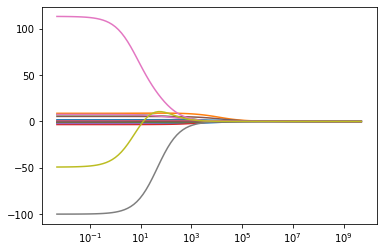

In [159]:
ax = plt.gca() #gca oluşturma işlemi
ax.plot(lambdalar, katsayilar) #her bir lambda değerine karşılık gelecek şekilde katsayiların nasıl oluştuğuna bakıcaz.
ax.set_xscale("log") #logaritmik dönüşüm

## Tahmin

In [162]:
ridge_model = Ridge().fit(X_train, y_train)

In [163]:
y_pred = ridge_model.predict(X_train) #tahmin edilen y değerlerine atama yaptık.

In [164]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [165]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [167]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred)) #hata kareler ortalamasının karekörü
RMSE

289.34470696006565

In [169]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.39315856063143

In [170]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [171]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) #hata kareler ortalamasının karekörü
RMSE

356.80829057302424

## Model Tuning

#### Neden Model Tuning

In [172]:
ridge_model = Ridge().fit(X_train, y_train) #Ridge modeli kullanılıp fit edildi.
y_pred = ridge_model.predict(X_test) #test setinin bağımlı değişken değerleri(y) tahmin edildi.
np.sqrt(mean_squared_error(y_test, y_pred)) #tahmin edilen değerler ile gerçek değerler karşılaştırıldı.

356.80829057302424

In [173]:
np.random.randint(0,1000,100) #0-1000 arası rastgele 100 sayı ürettik

array([281, 388, 244, 255, 734, 468, 885, 661, 810, 345, 908, 729, 614,
       212, 236, 921, 719, 610, 343, 917, 355, 524, 426, 854, 749, 712,
       994, 135, 461, 267, 658, 965, 917, 943, 747, 186, 243,  90,  75,
       766, 256, 346, 370, 900, 915, 659, 473, 130, 874, 589, 791, 749,
       849, 755, 696, 360, 196, 842, 417, 317, 691, 368, 760, 396,  32,
       838, 346, 556, 922, 148,  27, 384, 632, 968, 551,   3, 415, 598,
       899, 593,  98, 930, 282, 411, 940, 538, 145, 919, 337, 739, 831,
       778, 551, 338, 416, 857, 479, 633, 478, 415])

In [174]:
lambdalar1 = np.random.randint(0,1000,100)

In [175]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [179]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #neg_mean_squared_error=hata kareler ortalaması, 10katlı, standartlaşma işlemi true
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [180]:
ridgecv.alpha_ #optimum paremetre olarak belirlenen alfa(lamda) değeri

0.7599555414764666

In [181]:
#final modeli

In [183]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [184]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.858304727152

In [185]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #neg_mean_squared_error=hata kareler ortalaması, 10katlı, standartlaşma işlemi true
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([495, 500, 871, 413, 585, 139, 152, 977, 949, 854, 324, 668, 674,
       416, 779, 844, 202,  68, 516, 134, 429,  44, 991, 440, 300, 886,
       549, 669,  52, 658, 133, 568, 132, 782, 418, 442, 557, 971, 760,
       291,  22,  91, 726, 563, 439, 831, 252, 536, 314, 710, 122, 919,
       153, 460, 532, 120, 418, 316,  34, 609, 518, 113, 985, 600, 848,
       403, 368, 348, 588, 202,  72, 592, 303, 718, 206, 365, 259, 238,
       138, 470, 481, 290,  41, 578, 624, 905, 942, 528, 818, 904, 683,
       587,  93, 980, 710, 352, 501, 294, 226, 154]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [186]:
ridgecv.alpha_

22

In [187]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [188]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.49164997581744

## Lasso Regresyon

#### Gerekli Kütüphaneler

In [190]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [192]:
df = pd.read_csv("./makine_ogrenmesi/dog_reg_mod/Hitters.csv")

df = df.dropna() #Eksik verilerden kurturuldu.

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.

y = df["Salary"] #bağımlı değişkenimiz

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [193]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [195]:
df.shape

(263, 20)

In [197]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850403, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [209]:
lasso_model.alpha

1.0

In [210]:
lasso_model.intercept_

-5.5874506773358235

In [211]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [212]:
#farklı lambda değerlerine karşılık katsayılar

In [218]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,100000,10)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

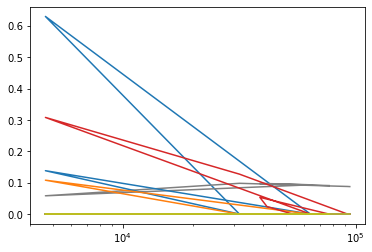

In [219]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [ ]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [220]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679485381, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374418437, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conve

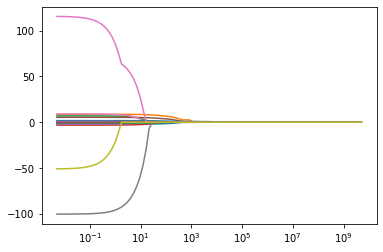

In [221]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

## Tahmin

In [223]:
lasso_model.alpha

1.0

In [225]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [226]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [227]:
 y_pred = lasso_model.predict(X_test)

In [228]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554033

In [229]:
r2_score(y_test, y_pred) #modelin açıklanabilirliğini gösterir.

0.4142279813236618

## Model Tuning

In [230]:
lasso_cv_model = LassoCV(cv = 10, max_iter = 100000).fit(X_train, y_train)

In [231]:
lasso_cv_model.alpha_

563.4670501833854

In [233]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [234]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train) #üsttekiyle aynı işlem

In [235]:
 y_pred = lasso_tuned.predict(X_test)

In [236]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.5957225069795

In [238]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)

In [239]:
lasso_cv_model.alpha_

201.85086292982749

In [240]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [242]:
 y_pred = lasso_tuned.predict(X_test)

In [243]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037446

In [244]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

In [245]:
#Örneğin yukarıda kat sayıları 0 olan değişkenler, oyuncuların ücret değerlendirmesinde önemi olmayan etkenlerdir.

## ElasticNet Regresyon Modeli

#### Gerekli Kütüphane

In [246]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

###### Veri Seti

In [247]:
df = pd.read_csv("./makine_ogrenmesi/dog_reg_mod/Hitters.csv")

df = df.dropna() #Eksik verilerden kurturuldu.

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding yapıldı.

y = df["Salary"] #bağımlı değişkenimiz

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) #kategorik değişkenleri dummy değişkenlerine çevirdik, bağımlı değişken ile bağımsız değişkenimizi ayırmış olduk.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [251]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367337, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [252]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [253]:
enet_model.intercept_

-6.465955602114036

In [256]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [257]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [258]:
y_pred = enet_model.predict(X_test)

In [259]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.16765481812456

In [260]:
r2_score(y_test, y_pred)

0.4107022246932688

## Model Tuning

In [273]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [275]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(X_train, y_train)

C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.948309518397, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.003149397671, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424791539088, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent

In [261]:
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train, y_train)

In [276]:
enet_cv_model.alpha_

5748.784976988678

In [277]:
enet_cv_model.intercept_

-31.46312122564109

In [278]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [265]:
#final modeli

In [279]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [280]:
y_pred = enet_tuned.predict(X_test)

In [281]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.9753065850553

In [269]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read

In [ ]:
l1_ratio değeri 0 olduğunda L2 cezalandırılması, 1 olduğunda ise L1 cezalandırılması yapılır. ikisinin arasında olduğunda cezalandırma methotlarının göreceli etkileri ifade edilmiş olur.